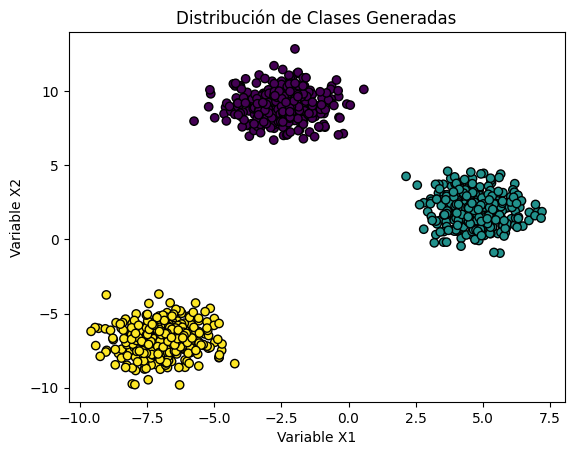

Precisión del modelo: 100.00%


In [3]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 1. Generación de Datos con make_blobs (Punto 1)
def generate_data(n_samples=1000, n_classes=3, n_features=2):
    X, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=n_features, random_state=42)
    return X, y

# 2. Implementación del Perceptrón Multiclase sin función de activación (Punto 2)
class PerceptronMulticlass:
    def __init__(self, learning_rate=0.01, n_iters=1000, n_classes=3, n_features=2):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.n_classes = n_classes
        self.n_features = n_features

        # Inicializar pesos y sesgos a ceros
        self.W = np.zeros((self.n_classes, self.n_features))
        self.b = np.zeros(self.n_classes)

    # Método de entrenamiento (fit)
    def fit(self, X, y):
        y = y.flatten().astype(int) 
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                x_i = x_i.reshape(-1, 1)  
                target = np.zeros(self.n_classes)
                target[y[idx]] = 1
                z = np.dot(self.W, x_i).flatten() + self.b

                for j in range(self.n_classes):
                    if (target[j] != (z[j] >= 0)):  
                        self.W[j] += self.learning_rate * (target[j] - (z[j] >= 0)) * x_i.flatten()
                        self.b[j] += self.learning_rate * (target[j] - (z[j] >= 0))

    # Método de predicción para nuevos ejemplos
    def predict(self, X):
        y_pred = []
        for x_i in X:
            x_i = x_i.reshape(-1, 1)  # Convertir cada ejemplo a un vector columna
            z = np.dot(self.W, x_i).flatten() + self.b
            y_hat = np.argmax(z)
            y_pred.append(y_hat)
        return np.array(y_pred)

def plot_data(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
    plt.title("Distribución de Clases Generadas")
    plt.xlabel("Variable X1")
    plt.ylabel("Variable X2")
    plt.show()

def main():
    X, y = generate_data(n_samples=1000, n_classes=3, n_features=2)
    plot_data(X, y)
    
    # Crear un modelo de Perceptrón Multiclase (Punto 2)
    model = PerceptronMulticlass(learning_rate=0.01, n_iters=1000, n_classes=3, n_features=2)
    
    # Entrenar el modelo con los datos generados
    model.fit(X, y)
    
    # Realizar predicciones con el modelo entrenado
    y_pred = model.predict(X)
    
    # Calcular y mostrar la precisión del modelo
    accuracy = np.mean(y_pred == y)
    print(f"Precisión del modelo: {accuracy * 100:.2f}%")

if __name__ == "__main__":
    main()